# Rising Bubble Notebook

In [92]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import subprocess

from importlib import reload
import utils
utils = reload(utils)

import plotting_tools as pt
pt = reload(pt)

In [104]:
dx = 20/180

print(180/4)

45.0


## Import the Python output

../output_rising_bubble/output_rising_bubble_ensemble=1_160_80_3.5_comp.h5
p2_nodes


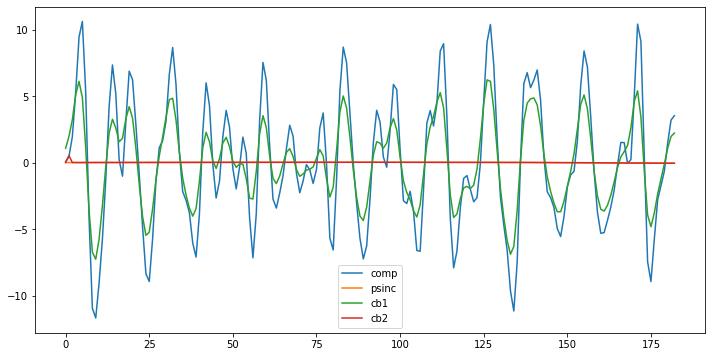

In [141]:
base_fn = "output_rising_bubble"
py_directory = "../%s/" %base_fn

Nx = 160
Ny = 80
et = 3.5

tc = utils.test_case(base_fn,py_directory,Nx,Ny,et)
# suffix = tc.cb_suffix(2,20)
suffix = 'comp'
fn = tc.get_filename(1,suffix)
path = tc.get_path(fn)
print(path)

step = 184
attribute = 'p2_nodes'

arr_lst = []
attributes = ['rho', 'rhou', 'rhov', 'rhoY', 'p2_nodes']
for attribute in attributes:
    arr_lst.append(tc.get_arr(path, step, 1, attribute, label_type='STEP').T)
test = np.array(arr_lst[3] / arr_lst[0]) * 300.

steps = np.arange(184)
probe_loc = [60,40]
comp = []
psinc = []
cb1, cb2 = [], []
attributes = ['p2_nodes']
for attribute in attributes:
    print(attribute)
    comp.append(tc.get_time_series(steps,1,attribute,'comp',probe_loc,label_type='STEP'))
    psinc.append(tc.get_time_series(steps,1,attribute,'psinc',probe_loc,label_type='STEP'))
    suffix = tc.cb_suffix(0,3)
    cb1.append(tc.get_time_series(steps,1,attribute,suffix,probe_loc,label_type='STEP'))
    suffix = tc.cb_suffix(2,0)
    cb2.append(tc.get_time_series(steps,1,attribute,suffix,probe_loc,label_type='STEP'))
    
comp = comp[0] * 8.61 * 1e4
psinc = psinc[0] * 8.61 * 1e4
cb1 = cb1[0] * 8.61 * 1e4
cb2 = cb2[0] * 8.61 * 1e4

fig = plt.figure(figsize=(12,6))
plt.plot(comp, label='comp')
plt.plot(psinc, label='psinc')
plt.plot(cb1, label='cb1')
plt.plot(cb2, label='cb2')
plt.legend()
plt.show()

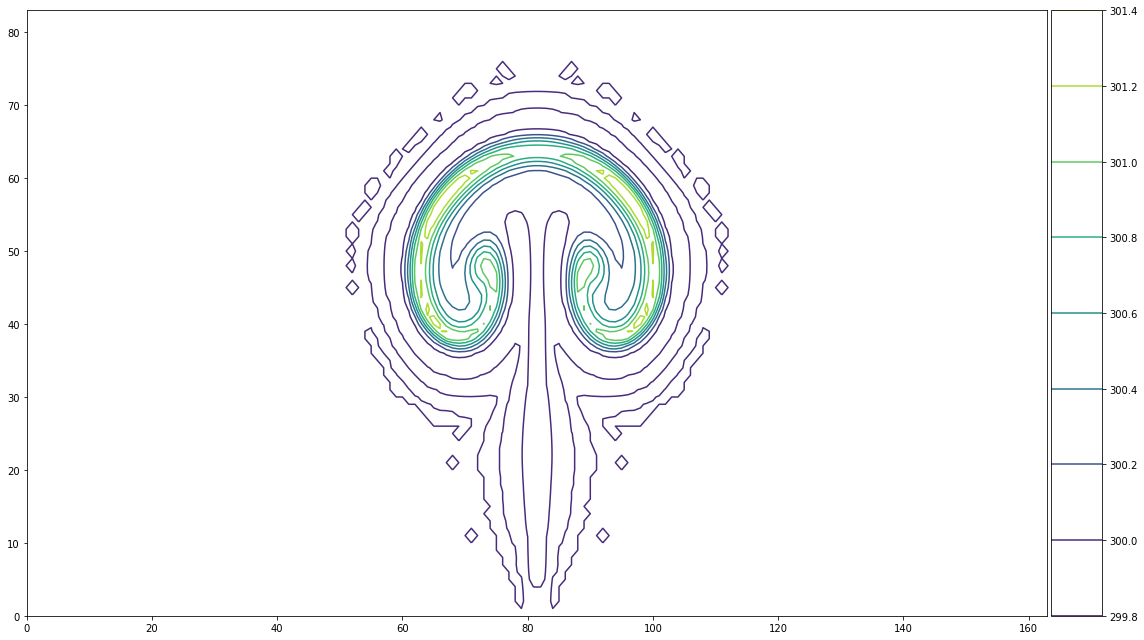

In [97]:
pl = pt.plotter([test])
pl.plot(figsize=(16,9),method='contour')

In [7]:
# open the Python HDF file
pyfile = h5py.File(py_path, 'r')

# make comparisons for the arrays.
# Arguments: C-array (class attribute), Python-array (numpy array), and a title.
# PPP = np.copy(py_out('dp2_nodes'))
# PPP[:,-4:-2] = py_out('dp2_nodes')[:,2:4][::-1]

# diff(c.pnew, PPP, 'dp2_nodes')

inner = (slice(2,-2),slice(2,-2))
iwp = (slice(2,-2),slice(2,-2))
iwp_e = (slice(2,-2),slice(2,-2))
iwp_n = (slice(2,-3),slice(2,-3))
# iwp = (slice(None),slice(None))
if time == t_label + '_' + 'after_ebnaimp':
#     diff(c.hcenter, py_out('hcenter'), 'hcenter')
#     diff(c.wplusx[iwp], py_out('wplusx')[iwp_n], 'wplusx')
#     diff(c.wplusy[iwp], py_out('wplusy')[iwp_n], 'wplusy')
    diff(c.pnew[inner], py_out('p2_full')[inner], 'p2_full', option='na')
#     diff(c.rhs_nodes, py_out('rhs_nodes'), 'rhs_nodes')
#     diff(c.p2_initial, py_out('p2_initial'), 'p2_initial')
    
if time == '001' or time == '005':
    diff(c.flux_x, py_out('rhoYu').T, 'rhoYu')
    diff(c.flux_y, py_out('rhoYv').T, 'rhoYv')
    
# print(py_out('lap_test'))
# fig = plt.figure(figsize=(5,5))
# plt.pcolor(py_out('lap_test'))
# plt.colorbar()
# plt.show()

# diff(c.pnew,py_out('dp2_nodes'),'dp2_nodes')
# diff(c.rhs, py_out('rhs'), 'rhs')
diff(c.p2_nodes,py_out('p2_nodes'),'p2_nodes', option='na')
diff(c.buoy,py_out('X'),'buoy')
# diff(c.dp2_c,py_out('dp2_cells'),'dp2_cells')
# diff(c.p2_c,py_out('p2_cells'),'p2_cells')

diff(c.rho,py_out('rho'),'rho')
# # diff(c.rhoe,py_out('rhoe'),'rhoe')
diff(c.rhoY,py_out('rhoY'),'rhoY')

diff(c.rhou,py_out('rhou'),'rhou', option='na')
# # print(np.argmax(np.abs(c.rhou - py_out('rhou'))))
diff(c.rhov,py_out('rhov'),'rhov')
# diff(c.rhow,py_out('rhow'),'rhow')

# diff(c.u, py_out('u'), 'u')
# diff(c.p, py_out('p'), 'p')
# diff(c.dpdim, py_out('dpdim'), 'dpdim')
diff(c.vortz, py_out('vortz'), 'vortz')

# diff(c.T, py_out('T'), 'T')
# diff(c.dT, py_out('dT'), 'dT')

diff(c.Y, py_out('Y'), 'Y')
# diff(c.dY, py_out('dY'), 'dY')

# print(c.hcenter[:][2:-2,2:-2])
# print(py_out('hcenter')[2:-2,2:-2])

# print(np.where(py_out('p2_initial')[inner] == 0.)[0])

# if time == '004':
#     idx = 0
#     fig = plt.figure(figsize=(9,9))
#     plt.plot(py_out('p2_full')[inner][:,idx], 'r')
#     plt.plot(c.pnew[inner][:,7])
#     plt.xlabel('p2_full')
#     plt.ylabel('error')
#     plt.show()

#     fig = plt.figure(figsize=(9,9))
#     plt.plot((py_out('p2_full') - c.pnew)[inner][:,idx])
#     plt.xlabel('diff')
#     plt.ylabel('error')
#     plt.show()
    
#     fig = plt.figure(figsize=(9,9))
#     plt.plot((py_out('p2_initial')[inner])[:,7])
#     plt.xlabel('p2_initial')
#     plt.ylabel('value')
#     plt.show()
    
#     print(py_out('p2_initial')[inner][2,:][:10])
    
if time == '002':
    idx = 1
    fig = plt.figure(figsize=(9,9))
    plt.plot(py_out('rhou')[:,idx],'r', label='python-output')
    plt.plot(c.rhou[:,idx],'k', label='c-output')
    plt.title('rhou, sliced at idx %i' %idx )
    plt.ylabel('rhou')
    plt.xlabel('x')
    plt.legend()
    plt.show()
    
    fig = plt.figure(figsize=(9,9))
    plt.plot((py_out('rhou') - c.rhou)[:,idx])
    plt.title('difference in rhou outputs, sliced at idx %i' %idx )
    plt.xlabel('diff')
    plt.ylabel('error')
    plt.show()
    
    
if time == '007':
    idx = 10
    fig = plt.figure(figsize=(9,9))
#     plt.plot((py_out('p2_nodes') - c.p2_nodes)[:,idx])
#     plt.plot(py_out('rhou')[:,idx][:2],'r', label='python-output')
#     plt.plot(c.rhou[:,idx][:2],'k', label='c-output')
    plt.plot((py_out('rhou') - c.rhou)[:,idx][:5])
    plt.title('difference in rhou outputs, sliced at idx %i' %idx )
    plt.xlabel('diff')
    plt.ylabel('error')
    plt.show()
    
if time == '005':
    idx = 3
    fig = plt.figure(figsize=(9,9))
    plt.plot((py_out('rhoYu').T - c.flux_x)[:,idx])
    plt.title('difference in rhoYu outputs, sliced at idx %i' %idx )
    plt.xlabel('diff')
    plt.ylabel('error')
    plt.show()
    
if time == '003':
    idx = 100
    fig = plt.figure(figsize=(9,9))
    plt.plot(py_out('rhov')[idx,:], '-ro',label='python')
    plt.plot(c.rhov[idx,:], '-bo',label='c')
    plt.title("rhov sliced at the 100th row (i.e. at x = 100)")
    plt.xlabel("y")
    plt.ylabel("rhov")
    plt.legend()
    plt.show()
    
# if time == t_label + '_' + 'after_half_step':
# idx = 7
# fig = plt.figure(figsize=(15,9))
# # plt.plot(py_out('rhou')[:,idx],'r', label='python-output')
# # plt.plot(c.rhou[:,idx],'k', label='c-output')
# plt.plot((py_out('rhou') - c.rhou)[:,idx], label='diff profile')
# plt.title('difference in rhou outputs, sliced at idx %i' %idx )
# plt.xlabel('diff')
# plt.ylabel('error')
# plt.legend()
# plt.show()

# idx = 12
# fig = plt.figure(figsize=(15,9))
# # plt.plot(py_out('p2_nodes')[:,idx],'r', label='python-output')
# # plt.plot(c.p2_nodes[:,idx],'k', label='c-output')
# plt.plot((py_out('p2_nodes') - c.p2_nodes)[:,idx], label='diff profile')
# plt.title('difference in p2_nodes outputs, sliced at idx %i' %idx )
# plt.xlabel('diff')
# plt.ylabel('error')
# plt.legend()
# plt.show()

# idx = 100
# fig = plt.figure(figsize=(15,9))
# plt.plot(py_out('p2_full')[inner][idx,:],'r', label='python-output')
# plt.plot(c.pnew[inner][idx,:],'k', label='c-output')
# # plt.plot((py_out('p2_nodes') - c.p2_nodes)[:,idx], label='diff profile')
# plt.title('difference in p2_nodes outputs, sliced at idx %i' %idx )
# plt.xlabel('diff')
# plt.ylabel('error')
# plt.legend()
# plt.show()

pyfile.close()

OSError: Unable to open file (unable to open file: name = '../output_rising_bubble_low_mach_gravity_comp.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

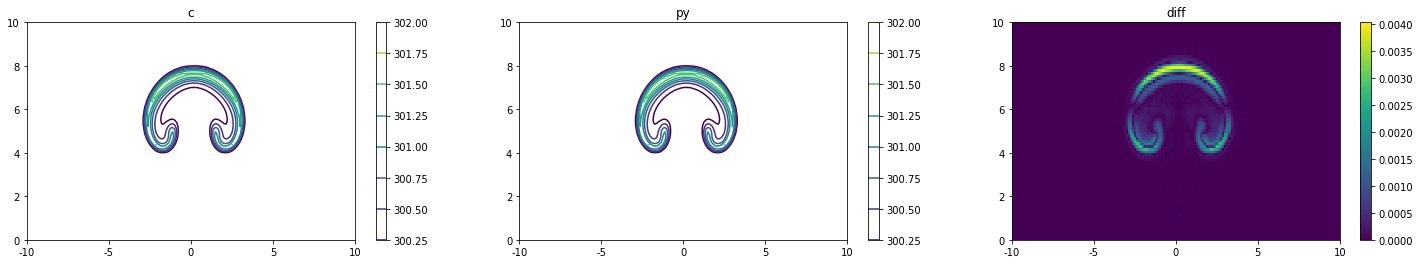

In [8]:
# plt.contour(c.rhoY[:].T / c.rho[:].T)
# plt.contour(c.rho[:].T)

# idx = 22
lvls = np.arange(300.25,302.01,0.25)
pyfile = h5py.File(py_path, 'r')
# fig = plt.figure(figsize=(16,8))
# # plt.pcolor(c.rhoY[:].T / c.rho[:].T * 300)
# plt.contour(py_out('rhoY').T / py_out('rho').T * 300, levels=lvls)
# plt.contour(c.rhoY[:].T / c.rho[:].T * 300, levels=lvls)
# # plt.contour((c.rhoY[:].T / c.rho[:].T  - py_out('rhoY').T / py_out('rho').T) * 300  )
# # plt.plot(py_out('rho').T[idx],label='py')
# # plt.plot(c.rho[:].T[idx],label='c')
# # plt.plot(c.rho[:].T[idx] - py_out('rho').T[idx])
# # plt.legend()
# # plt.vlines(82, 0, 80)
# # plt.hlines(64,0,160)
# # plt.contour(py_out('X').T)
# plt.colorbar()
# plt.ylim([0,80])
# plt.xlim([0,160])
# plt.yticks([0,16,32,48,64,80],np.arange(0,11,2))
# plt.xticks([0,40,80,120,160],np.arange(-10,10+1,5))
# plt.show()
# print(pyfile['rhoY'].keys())

figsize_tuple = (25,4)
fig, ax = plt.subplots(ncols=3, figsize=figsize_tuple)
# plot c array
im_c = ax[0].contour(c.rhoY[:].T / c.rho[:].T * 300, levels=lvls)
fig.colorbar(im_c,ax=ax[0])
ax[0].set_title("c")
ax[0].set_aspect('auto')
ax[0].set_xticks([0,40,80,120,160])
ax[0].set_xticklabels(np.arange(-10,10+1,5))
ax[0].set_xlim([0,160])

# plot python array
im_py = ax[1].contour(py_out('rhoY').T / py_out('rho').T * 300, levels=lvls)
fig.colorbar(im_py,ax=ax[1])
ax[1].set_title("py")
ax[1].set_aspect('auto')

# plot the difference between the two
im_diff = ax[2].pcolor(np.abs(c.rhoY[:].T / c.rho[:].T * 300 - py_out('rhoY').T / py_out('rho').T * 300))
fig.colorbar(im_diff,ax=ax[2])
ax[2].set_title("diff")
ax[2].set_aspect('auto')

plt.setp(ax, xlim=[0,160], ylim=[0,80], xticks=[0,40,80,120,160], xticklabels=np.arange(-10,10+1,5), yticks=[0,16,32,48,64,80], yticklabels=np.arange(0,11,2))

pyfile.close()